<a href="https://colab.research.google.com/github/AyrusCodes/Main-Project/blob/main/code_surya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/roboflow/train/വിചാരം/Screenshot-2025-01-02-105051_png_jpg.rf.cbbe8cc93b618834fabb8d9d178aa695.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-130826_png_jpg.rf.f19f13ea4fea0e9a5080024dfe97b8c4.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-105115_png_jpg.rf.968da6c2c4fbecf36778f7b94dcb73d3.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-103517_png_jpg.rf.84e10a2cc88f28bb224e82b725d05017.jpg  
  inflating: /content/roboflow/train/വിചാരം/Screenshot-2025-01-02-115542_png_jpg.rf.82f50a28f675835245f0e4b167b3fbd6.jpg  
  inflating: /content/roboflow/train/വിചാരം/Screenshot-2025-01-02-115542_png_jpg.rf.b14fcb679db14e107f4d9fbd0e6c5abe.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-105115_png_jpg.rf.55592c4ca4cf42e2c670b6f156fd5548.jpg  
  inflating: /content/roboflow/train/ദുഃഖം/Screenshot-2025-01-02-105115_png_jpg.rf.ef64c4f2d

In [ ]:
# Replace with the path of the folder to delete
!rm -r /content/dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, LSTM, Bidirectional, Input, Reshape, Dropout
from tensorflow.keras.models import Model
import os

# Create the ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set your dataset path
dataset_path = "/content/roboflow"  # Update this to your dataset path

# Use the pre-existing directories for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(32, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(dataset_path, 'valid'),
    target_size=(32, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=(32, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Typically no shuffle for test data
)

# Ensure consistent class mapping across generators
class_indices = train_generator.class_indices
validation_generator.class_indices = class_indices
test_generator.class_indices = class_indices

# Define the CNN + LSTM model for sequence recognition
input_layer = Input(shape=(32, 128, 1))

# CNN feature extraction
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Reshape for sequence processing
x = Reshape((16, -1))(x)

# Bidirectional LSTM layers for sequence processing
x = Bidirectional(LSTM(256, return_sequences=True))(x)
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(128, return_sequences=False))(x)
x = Dropout(0.2)(x)

# Dense layers for classification
x = Dense(256, activation='relu')(x)
output_layer = Dense(len(class_indices), activation='softmax')(x)

# Create and compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Save the model
model.save("malayalam_word_recognition.h5")


Found 8811 images belonging to 254 classes.
Found 866 images belonging to 254 classes.
Found 389 images belonging to 250 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 128, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 128, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 32, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 32, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 16, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 16, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 16, 512)             │       1,574,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 254)                 │          65,278 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,455,038 (9.37 MB)

 Trainable params: 2,455,038 (9.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


276/276 ━━━━━━━━━━━━━━━━━━━━ 38s 102ms/step - accuracy: 0.0055 - loss: 5.5216 - val_accuracy: 0.0127 - val_loss: 5.3807
Epoch 2/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 29s 104ms/step - accuracy: 0.0161 - loss: 5.2643 - val_accuracy: 0.0335 - val_loss: 4.9428
Epoch 3/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 27s 98ms/step - accuracy: 0.0450 - loss: 4.7616 - val_accuracy: 0.0600 - val_loss: 4.2804
Epoch 4/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 43s 104ms/step - accuracy: 0.0960 - loss: 4.0056 - val_accuracy: 0.1709 - val_loss: 3.4390
Epoch 5/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 29s 102ms/step - accuracy: 0.2377 - loss: 2.9679 - val_accuracy: 0.3349 - val_loss: 2.5145
Epoch 6/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 27s 98ms/step - accuracy: 0.4626 - loss: 1.8858 - val_accuracy: 0.5485 - val_loss: 1.5629
Epoch 7/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - accuracy: 0.6482 - loss: 1.1721 - val_accuracy: 0.6963 - val_loss: 1.1403
Epoch 8/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 29s 103ms/step - accuracy: 0.7726 - loss: 0.7184 - val_ac

Test Loss: 15.774787902832031, Test Accuracy: 0.4730077087879181


Label mapping saved successfully!


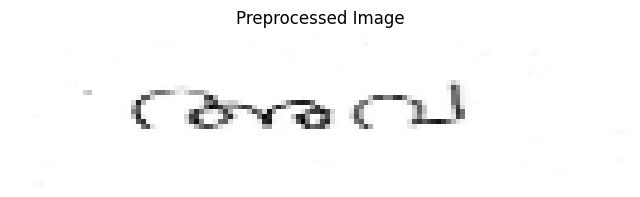

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: ദാനം
Confidence: 99.52%

Top 3 Predictions:
--------------------------------------------------
ദാനം: 99.52%
ഭാരം: 0.36%
മാനം: 0.05%


'ദാനം'

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt

# Function to preprocess image for prediction
def preprocess_image(image_path, display=False):
    """
    Preprocess the input image by converting to grayscale, resizing, normalizing,
    and adding the required dimensions before feeding it into the model.
    Optionally displays the preprocessed image.

    Args:
    - image_path (str): Path to the input image.
    - display (bool): Whether to display the preprocessed image using matplotlib.

    Returns:
    - np.ndarray: Preprocessed image ready for model prediction.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Resize the image to the model's expected input size (32x128)
    img_resized = cv2.resize(img, (128, 32))

    # Normalize pixel values to the range [0, 1]
    img_normalized = img_resized / 255.0

    # Add channel and batch dimensions
    img_processed = np.expand_dims(img_normalized, axis=-1)  # Add channel dimension (grayscale)
    img_processed = np.expand_dims(img_processed, axis=0)   # Add batch dimension

    # Optionally display the preprocessed image
    if display:
        plt.figure(figsize=(8, 4))
        plt.imshow(img_resized, cmap='gray')
        plt.axis('off')
        plt.title("Preprocessed Image")
        plt.show()

    return img_processed

# Function to save the correct class mapping from the train folder
def save_label_mapping(train_folder, mapping_file):
    class_labels = sorted(os.listdir(train_folder))  # Folder names inside train folder
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    # Save the mapping to a JSON file
    with open(mapping_file, 'w', encoding='utf-8') as f:
        json.dump(class_mapping, f, ensure_ascii=False, indent=4)
    print("Label mapping saved successfully!")

# Function to load class mapping from a JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    # Create reverse mapping (index to label)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

# Function to predict a single image
def predict_word(image_path, model, class_mapping, display_image=False):
    # Preprocess the input image
    img_array = preprocess_image(image_path, display=display_image)

    # Get predictions from the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Convert the prediction to a word using the class mapping
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    # Print the prediction results
    print("\nPrediction Results:")
    print("-" * 50)
    print(f"Predicted Word: {predicted_word}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the top 3 predictions
    top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    print("\nTop 3 Predictions:")
    print("-" * 50)
    for idx in top_3_indices:
        word = class_mapping[idx]
        conf = predictions[0][idx] * 100
        print(f"{word}: {conf:.2f}%")

    return predicted_word

# Function to test multiple images from a folder
def test_multiple_images(model_path, image_folder, label_mapping_path):
    # Load the trained model
    model = tf.keras.models.load_model(model_path)

    # Load the class mapping
    class_mapping = load_class_mapping(label_mapping_path)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    print(f"\nTesting {len(image_files)} images...")
    print("-" * 50)

    # Predict each image
    for image_file in image_files:
        print(f"\nTesting image: {image_file}")
        image_path = os.path.join(image_folder, image_file)
        predict_word(image_path, model, class_mapping, display_image=True)
        print("-" * 50)

# Example usage for saving class mapping
train_folder = "/content/roboflow/train"  # Path to your train folder
mapping_file = "label_mapping.json"  # Path to save the label mapping
save_label_mapping(train_folder, mapping_file)

# Example usage for predicting a single image
model_path = "malayalam_word_recognition.h5"  # Path to your saved model
image_path = "/content/Screenshot 2025-01-09 144624.png"  # Path to your test image
label_mapping_path = "label_mapping.json"  # Path to your saved label mapping

# Load the model and class mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Predict a single image
predict_word(image_path, model, class_mapping, display_image=True)

# Example usage for testing multiple images
# image_folder = "/content/dataset/test/അടയാളം"
# test_multiple_images(model_path, image_folder, label_mapping_path)


Label mapping saved successfully!


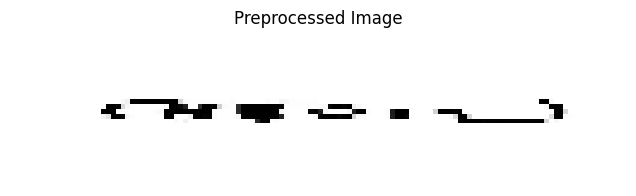

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: അവ
Confidence: 99.94%

Top 3 Predictions:
--------------------------------------------------
അവ: 99.94%
തറ: 0.06%
ആന: 0.00%


'അവ'

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt

# Function to preprocess image for prediction and display it
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Resize the image to the model's expected input size (32x128)
    img_resized = cv2.resize(img, (128, 32))

    # Normalize pixel values to the range [0, 1]
    img_resized = img_resized / 255.0

    # Add channel and batch dimensions
    img_resized = np.expand_dims(img_resized, axis=-1)  # Add channel dimension (grayscale)
    img_resized = np.expand_dims(img_resized, axis=0)   # Add batch dimension

    # Display the preprocessed image
    plt.figure(figsize=(10, 2))
    plt.imshow(img_resized[0, :, :, 0], cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    plt.show()

    return img_resized

# Function to save the correct class mapping from the train folder
def save_label_mapping(train_folder, mapping_file):
    class_labels = sorted(os.listdir(train_folder))  # Folder names inside train folder
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    # Save the mapping to a JSON file
    with open(mapping_file, 'w', encoding='utf-8') as f:
        json.dump(class_mapping, f, ensure_ascii=False, indent=4)
    print("Label mapping saved successfully!")

# Function to load class mapping from a JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    # Create reverse mapping (index to label)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

# Function to predict a single image
def predict_word(image_path, model, class_mapping):
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Get predictions from the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Convert the prediction to a word using the class mapping
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    # Print the prediction results
    print("\nPrediction Results:")
    print("-" * 50)
    print(f"Predicted Word: {predicted_word}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the top 3 predictions
    top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    print("\nTop 3 Predictions:")
    print("-" * 50)
    for idx in top_3_indices:
        word = class_mapping[idx]
        conf = predictions[0][idx] * 100
        print(f"{word}: {conf:.2f}%")

    return predicted_word

# Function to test multiple images from a folder
def test_multiple_images(model_path, image_folder, label_mapping_path):
    # Load the trained model
    model = tf.keras.models.load_model(model_path)

    # Load the class mapping
    class_mapping = load_class_mapping(label_mapping_path)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    print(f"\nTesting {len(image_files)} images...")
    print("-" * 50)

    # Predict each image
    for image_file in image_files:
        print(f"\nTesting image: {image_file}")
        image_path = os.path.join(image_folder, image_file)
        predict_word(image_path, model, class_mapping)
        print("-" * 50)

# Example usage for saving class mapping
train_folder = "/content/roboflow/train"  # Path to your train folder
mapping_file = "label_mapping.json"  # Path to save the label mapping
save_label_mapping(train_folder, mapping_file)

# Example usage for predicting a single image
model_path = "malayalam_word_recognition.h5"  # Path to your saved model
image_path = "/content/roboflow/valid/അവ/Screenshot-2025-01-02-101920_png_jpg.rf.9fadd35235624abb009875e3bb647b56.jpg"  # Path to your test image
label_mapping_path = "label_mapping.json"  # Path to your saved label mapping

# Load the model and class mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Predict a single image
predict_word(image_path, model, class_mapping)

# Example usage for testing multiple images
# image_folder = "/content/dataset/test/അടയാളം"
# test_multiple_images(model_path, image_folder, label_mapping_path)


Label mapping saved successfully!


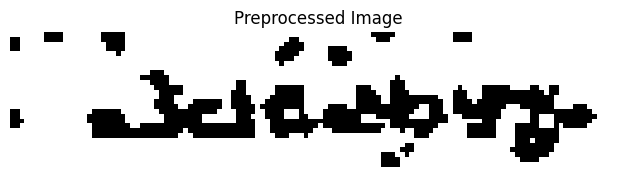

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: ജില്ല
Confidence: 99.13%

Top 3 Predictions:
--------------------------------------------------
ജില്ല: 99.13%
മുഴങ്ങി: 0.35%
ഇത്: 0.16%


'ജില്ല'

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt

# Function to preprocess image for prediction and display it
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Resize the image to the model's expected input size (32x128)
    img_resized = cv2.resize(img, (128, 32))

    # Additional Preprocessing
    # 1. Histogram Equalization: Enhances the contrast of the image
    img_resized = cv2.equalizeHist(img_resized)

    # 2. Gaussian Blur: Reduces noise and smooths the image
    img_resized = cv2.GaussianBlur(img_resized, (5, 5), 0)

    # 3. Adaptive Thresholding: Improves text clarity in certain lighting conditions
    img_resized = cv2.adaptiveThreshold(img_resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)

    # 4. Normalize pixel values to the range [0, 1]
    img_resized = img_resized / 255.0

    # Add channel and batch dimensions
    img_resized = np.expand_dims(img_resized, axis=-1)  # Add channel dimension (grayscale)
    img_resized = np.expand_dims(img_resized, axis=0)   # Add batch dimension

    # Display the preprocessed image
    plt.figure(figsize=(10, 2))
    plt.imshow(img_resized[0, :, :, 0], cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    plt.show()

    return img_resized

# Function to save the correct class mapping from the train folder
def save_label_mapping(train_folder, mapping_file):
    class_labels = sorted(os.listdir(train_folder))  # Folder names inside train folder
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    # Save the mapping to a JSON file
    with open(mapping_file, 'w', encoding='utf-8') as f:
        json.dump(class_mapping, f, ensure_ascii=False, indent=4)
    print("Label mapping saved successfully!")

# Function to load class mapping from a JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    # Create reverse mapping (index to label)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

# Function to predict a single image
def predict_word(image_path, model, class_mapping):
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Get predictions from the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Convert the prediction to a word using the class mapping
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    # Print the prediction results
    print("\nPrediction Results:")
    print("-" * 50)
    print(f"Predicted Word: {predicted_word}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the top 3 predictions
    top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    print("\nTop 3 Predictions:")
    print("-" * 50)
    for idx in top_3_indices:
        word = class_mapping[idx]
        conf = predictions[0][idx] * 100
        print(f"{word}: {conf:.2f}%")

    return predicted_word

# Function to test multiple images from a folder
def test_multiple_images(model_path, image_folder, label_mapping_path):
    # Load the trained model
    model = tf.keras.models.load_model(model_path)

    # Load the class mapping
    class_mapping = load_class_mapping(label_mapping_path)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    print(f"\nTesting {len(image_files)} images...")
    print("-" * 50)

    # Predict each image
    for image_file in image_files:
        print(f"\nTesting image: {image_file}")
        image_path = os.path.join(image_folder, image_file)
        predict_word(image_path, model, class_mapping)
        print("-" * 50)

# Example usage for saving class mapping
train_folder = "/content/roboflow/train"  # Path to your train folder
mapping_file = "label_mapping.json"  # Path to save the label mapping
save_label_mapping(train_folder, mapping_file)

# Example usage for predicting a single image
model_path = "malayalam_word_recognition.h5"  # Path to your saved model
image_path = "/content/Screenshot 2025-01-09 144637.png"  # Path to your test image
label_mapping_path = "label_mapping.json"  # Path to your saved label mapping

# Load the model and class mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Predict a single image
predict_word(image_path, model, class_mapping)

# Example usage for testing multiple images
# image_folder = "/content/dataset/test/അടയാളം"
# test_multiple_images(model_path, image_folder, label_mapping_path)


Label mapping saved successfully!


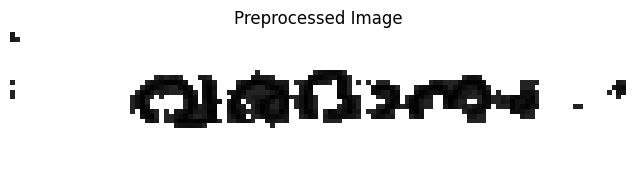

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: വരെ
Confidence: 25.78%

Top 3 Predictions:
--------------------------------------------------
വരെ: 25.78%
അതെ: 15.45%
ബന്ധം: 15.22%


'വരെ'

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt

# Function to preprocess image for prediction and display it
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Resize the image to the model's expected input size (32x128)
    img_resized = cv2.resize(img, (128, 32))

    # Additional Preprocessing
    # 1. Histogram Equalization: Enhances the contrast of the image
    img_resized = cv2.equalizeHist(img_resized)

    # Normalize pixel values to the range [0, 1]
    img_resized = img_resized / 255.0

    # Add channel and batch dimensions
    img_resized = np.expand_dims(img_resized, axis=-1)  # Add channel dimension (grayscale)
    img_resized = np.expand_dims(img_resized, axis=0)   # Add batch dimension

    # Display the preprocessed image
    plt.figure(figsize=(10, 2))
    plt.imshow(img_resized[0, :, :, 0], cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    plt.show()

    return img_resized

# Function to save the correct class mapping from the train folder
def save_label_mapping(train_folder, mapping_file):
    class_labels = sorted(os.listdir(train_folder))  # Folder names inside train folder
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    # Save the mapping to a JSON file
    with open(mapping_file, 'w', encoding='utf-8') as f:
        json.dump(class_mapping, f, ensure_ascii=False, indent=4)
    print("Label mapping saved successfully!")

# Function to load class mapping from a JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    # Create reverse mapping (index to label)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

# Function to predict a single image
def predict_word(image_path, model, class_mapping):
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Get predictions from the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Convert the prediction to a word using the class mapping
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    # Print the prediction results
    print("\nPrediction Results:")
    print("-" * 50)
    print(f"Predicted Word: {predicted_word}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the top 3 predictions
    top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    print("\nTop 3 Predictions:")
    print("-" * 50)
    for idx in top_3_indices:
        word = class_mapping[idx]
        conf = predictions[0][idx] * 100
        print(f"{word}: {conf:.2f}%")

    return predicted_word

# Function to test multiple images from a folder
def test_multiple_images(model_path, image_folder, label_mapping_path):
    # Load the trained model
    model = tf.keras.models.load_model(model_path)

    # Load the class mapping
    class_mapping = load_class_mapping(label_mapping_path)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    print(f"\nTesting {len(image_files)} images...")
    print("-" * 50)

    # Predict each image
    for image_file in image_files:
        print(f"\nTesting image: {image_file}")
        image_path = os.path.join(image_folder, image_file)
        predict_word(image_path, model, class_mapping)
        print("-" * 50)

# Example usage for saving class mapping
train_folder = "/content/roboflow/train"  # Path to your train folder
mapping_file = "label_mapping.json"  # Path to save the label mapping
save_label_mapping(train_folder, mapping_file)

# Example usage for predicting a single image
model_path = "malayalam_word_recognition.h5"  # Path to your saved model
image_path = "/content/Screenshot 2025-01-09 144633.png"  # Path to your test image
label_mapping_path = "label_mapping.json"  # Path to your saved label mapping

# Load the model and class mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Predict a single image
predict_word(image_path, model, class_mapping)

# Example usage for testing multiple images
# image_folder = "/content/dataset/test/അടയാളം"
# test_multiple_images(model_path, image_folder, label_mapping_path)


Label mapping saved successfully!


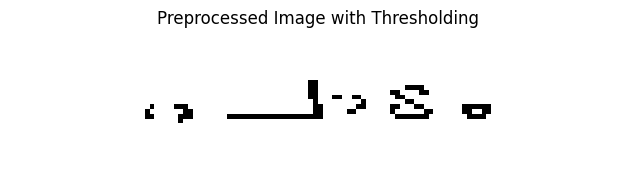

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

Prediction Results:
--------------------------------------------------
Predicted Word: പഴം
Confidence: 95.42%

Top 3 Predictions:
--------------------------------------------------
പഴം: 95.42%
പാടം: 4.24%
പദം: 0.14%


'പഴം'

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt

# Function to preprocess image for prediction and display it
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Resize the image to the model's expected input size (32x128)
    img_resized = cv2.resize(img, (128, 32))

    # Apply Otsu's thresholding (binary thresholding)
    _, img_thresholded = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Normalize pixel values to the range [0, 1]
    img_thresholded = img_thresholded / 255.0

    # Add channel and batch dimensions
    img_thresholded = np.expand_dims(img_thresholded, axis=-1)  # Add channel dimension (grayscale)
    img_thresholded = np.expand_dims(img_thresholded, axis=0)   # Add batch dimension

    # Display the preprocessed image
    plt.figure(figsize=(10, 2))
    plt.imshow(img_thresholded[0, :, :, 0], cmap='gray')
    plt.title("Preprocessed Image with Thresholding")
    plt.axis('off')
    plt.show()

    return img_thresholded

# Function to save the correct class mapping from the train folder
def save_label_mapping(train_folder, mapping_file):
    class_labels = sorted(os.listdir(train_folder))  # Folder names inside train folder
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    # Save the mapping to a JSON file
    with open(mapping_file, 'w', encoding='utf-8') as f:
        json.dump(class_mapping, f, ensure_ascii=False, indent=4)
    print("Label mapping saved successfully!")

# Function to load class mapping from a JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    # Create reverse mapping (index to label)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

# Function to predict a single image
def predict_word(image_path, model, class_mapping):
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Get predictions from the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Convert the prediction to a word using the class mapping
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    # Print the prediction results
    print("\nPrediction Results:")
    print("-" * 50)
    print(f"Predicted Word: {predicted_word}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the top 3 predictions
    top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    print("\nTop 3 Predictions:")
    print("-" * 50)
    for idx in top_3_indices:
        word = class_mapping[idx]
        conf = predictions[0][idx] * 100
        print(f"{word}: {conf:.2f}%")

    return predicted_word

# Function to test multiple images from a folder
def test_multiple_images(model_path, image_folder, label_mapping_path):
    # Load the trained model
    model = tf.keras.models.load_model(model_path)

    # Load the class mapping
    class_mapping = load_class_mapping(label_mapping_path)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    print(f"\nTesting {len(image_files)} images...")
    print("-" * 50)

    # Predict each image
    for image_file in image_files:
        print(f"\nTesting image: {image_file}")
        image_path = os.path.join(image_folder, image_file)
        predict_word(image_path, model, class_mapping)
        print("-" * 50)

# Example usage for saving class mapping
train_folder = "/content/roboflow/train"  # Path to your train folder
mapping_file = "label_mapping.json"  # Path to save the label mapping
save_label_mapping(train_folder, mapping_file)

# Example usage for predicting a single image
model_path = "malayalam_word_recognition.h5"  # Path to your saved model
image_path = "/content/Screenshot 2025-01-09 144628.png"  # Path to your test image
label_mapping_path = "label_mapping.json"  # Path to your saved label mapping

# Load the model and class mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Predict a single image
predict_word(image_path, model, class_mapping)

# Example usage for testing multiple images
# image_folder = "/content/dataset/test/അടയാളം"
# test_multiple_images(model_path, image_folder, label_mapping_path)


In [ ]:
!pip install pytesseract


In [ ]:
!apt-get install tesseract-ocr-mal


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-mal
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,678 kB of archives.
After this operation, 5,291 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-mal all 1:4.00~git30-7274cfa-1.1 [1,678 kB]
Fetched 1,678 kB in 1s (2,165 kB/s)
Selecting previously unselected package tesseract-ocr-mal.
(Reading database ... 123679 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-mal_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-mal (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-mal (1:4.00~git30-7274cfa-1.1) ...


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving mal.traineddata to mal.traineddata


In [ ]:
import shutil

# Move the uploaded Malayalam trained data file to Tesseract's tessdata folder
shutil.move('mal.traineddata', '/usr/share/tesseract-ocr/4.00/tessdata/malayalam.traineddata')


'/usr/share/tesseract-ocr/4.00/tessdata/malayalam.traineddata'

In [ ]:
!apt-get remove --purge tesseract-ocr
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-mal


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following package was automatically installed and is no longer required:
  tesseract-ocr-osd
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  tesseract-ocr*
0 upgraded, 0 newly installed, 1 to remove and 54 not upgraded.
After this operation, 926 kB disk space will be freed.
(Reading database ... 123683 files and directories currently installed.)
Removing tesseract-ocr (4.1.1-2.1build1) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr
0 upgraded, 1 newly installed, 0 to remove and 54 not upgraded.
Need to get 236 kB of archives.
After this operation, 926 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fet

In [ ]:
# Install tesseract and required language models
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-eng  # For English language model


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,227 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,560 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,527 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [45.2 kB]
Get:13 https:/

In [ ]:
from google.colab import files

# Upload the .pb file
uploaded = files.upload()


Saving frozen_east_text_detection.pb to frozen_east_text_detection.pb


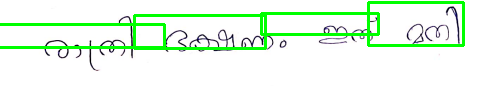

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained EAST model
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# Load the image and get its dimensions
image = cv2.imread('/content/Screenshot 2025-01-09 144651.png')
orig = image.copy()
(H, W) = image.shape[:2]

# Resize the image to a multiple of 32
new_W = (W // 32) * 32
new_H = (H // 32) * 32
resized_image = cv2.resize(image, (new_W, new_H))

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (new_W, new_H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3",
]
(scores, geometry) = net.forward(layer_names)

# Decode the predictions
def decode_predictions(scores, geometry, conf_threshold=0.5):
    num_rows, num_cols = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        for x in range(num_cols):
            score = scores[0, 0, y, x]

            if score < conf_threshold:
                continue

            offset_x, offset_y = x * 4.0, y * 4.0
            angle = geometry[0, 4, y, x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            end_x = int(offset_x + (cos * w) + (sin * h))
            end_y = int(offset_y - (sin * w) + (cos * h))
            start_x = int(offset_x - (cos * w) - (sin * h))
            start_y = int(offset_y + (sin * w) - (cos * h))

            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(float(score))

    return boxes, confidences

# Get boxes and confidences
boxes, confidences = decode_predictions(scores, geometry)

# Apply Non-Maximum Suppression to filter overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw the bounding boxes on the original image
if len(indices) > 0:
    for i in indices.flatten():
        (start_x, start_y, end_x, end_y) = boxes[i]
        cv2.rectangle(orig, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

# Display the result
cv2_imshow(orig)


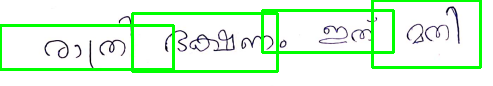

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained EAST model
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# Load the image and get its dimensions
image = cv2.imread('/content/Screenshot 2025-01-09 144651.png')
orig = image.copy()
(H, W) = image.shape[:2]

# Resize the image to a multiple of 32
new_W = (W // 32) * 32
new_H = (H // 32) * 32
resized_image = cv2.resize(image, (new_W, new_H))

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (new_W, new_H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3",
]
(scores, geometry) = net.forward(layer_names)

# Decode the predictions
def decode_predictions(scores, geometry, conf_threshold=0.5):
    num_rows, num_cols = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        for x in range(num_cols):
            score = scores[0, 0, y, x]

            if score < conf_threshold:
                continue

            # Compute the offset
            offset_x, offset_y = x * 4.0, y * 4.0

            # Get the rotation angle
            angle = geometry[0, 4, y, x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            # Get the box dimensions
            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            # Calculate the bounding box coordinates
            end_x = int(offset_x + (cos * w) + (sin * h))
            end_y = int(offset_y - (sin * w) + (cos * h))
            start_x = int(offset_x - (cos * w) - (sin * h))
            start_y = int(offset_y + (sin * w) - (cos * h))

            # Add padding to the bounding box
            padding = 5
            start_x = max(0, start_x - padding)
            start_y = max(0, start_y - padding)
            end_x = min(W, end_x + padding)
            end_y = min(H, end_y + padding)

            # Append the box and confidence score
            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(float(score))

    return boxes, confidences

# Get boxes and confidences
boxes, confidences = decode_predictions(scores, geometry)

# Scale the boxes back to the original image size
ratio_w = W / float(new_W)
ratio_h = H / float(new_H)

scaled_boxes = []
for box in boxes:
    (start_x, start_y, end_x, end_y) = box
    start_x = int(start_x * ratio_w)
    start_y = int(start_y * ratio_h)
    end_x = int(end_x * ratio_w)
    end_y = int(end_y * ratio_h)
    scaled_boxes.append((start_x, start_y, end_x, end_y))

# Apply Non-Maximum Suppression to filter overlapping boxes
indices = cv2.dnn.NMSBoxes(scaled_boxes, confidences, 0.5, 0.4)

# Draw the bounding boxes on the original image
if len(indices) > 0:
    for i in indices.flatten():
        (start_x, start_y, end_x, end_y) = scaled_boxes[i]
        cv2.rectangle(orig, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

# Display the result
cv2_imshow(orig)


In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,416 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

Saved: word_1.png


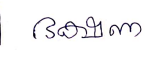

Saved: word_2.png


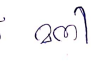

Saved: word_3.png


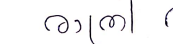

Saved: word_4.png


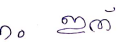

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained EAST model
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# Load the image and get its dimensions
image = cv2.imread('/content/Screenshot 2025-01-09 144651.png')
orig = image.copy()
(H, W) = image.shape[:2]

# Resize the image to a multiple of 32
new_W = (W // 32) * 32
new_H = (H // 32) * 32
resized_image = cv2.resize(image, (new_W, new_H))

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (new_W, new_H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3",
]
(scores, geometry) = net.forward(layer_names)

# Decode the predictions
def decode_predictions(scores, geometry, conf_threshold=0.5):
    num_rows, num_cols = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        for x in range(num_cols):
            score = scores[0, 0, y, x]

            if score < conf_threshold:
                continue

            # Compute the offset
            offset_x, offset_y = x * 4.0, y * 4.0

            # Get the rotation angle
            angle = geometry[0, 4, y, x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            # Get the box dimensions
            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            # Calculate the bounding box coordinates
            end_x = int(offset_x + (cos * w) + (sin * h))
            end_y = int(offset_y - (sin * w) + (cos * h))
            start_x = int(offset_x - (cos * w) - (sin * h))
            start_y = int(offset_y + (sin * w) - (cos * h))

            # Add padding to the bounding box
            padding = 5
            start_x = max(0, start_x - padding)
            start_y = max(0, start_y - padding)
            end_x = min(W, end_x + padding)
            end_y = min(H, end_y + padding)

            # Append the box and confidence score
            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(float(score))

    return boxes, confidences

# Get boxes and confidences
boxes, confidences = decode_predictions(scores, geometry)

# Scale the boxes back to the original image size
ratio_w = W / float(new_W)
ratio_h = H / float(new_H)

scaled_boxes = []
for box in boxes:
    (start_x, start_y, end_x, end_y) = box
    start_x = int(start_x * ratio_w)
    start_y = int(start_y * ratio_h)
    end_x = int(end_x * ratio_w)
    end_y = int(end_y * ratio_h)
    scaled_boxes.append((start_x, start_y, end_x, end_y))

# Apply Non-Maximum Suppression to filter overlapping boxes
indices = cv2.dnn.NMSBoxes(scaled_boxes, confidences, 0.5, 0.4)

# Crop and save each word segment
if len(indices) > 0:
    for i, index in enumerate(indices.flatten()):
        (start_x, start_y, end_x, end_y) = scaled_boxes[index]

        # Crop the detected region
        cropped_image = orig[start_y:end_y, start_x:end_x]

        # Save the cropped image
        file_name = f"word_{i + 1}.png"
        cv2.imwrite(file_name, cropped_image)
        print(f"Saved: {file_name}")

        # Optionally, display the cropped image
        cv2_imshow(cropped_image)


Saved: word_1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step

Predicted Word: മതി with confidence: 88.82%


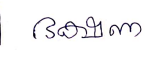

Saved: word_2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Predicted Word: ചിരി with confidence: 74.20%


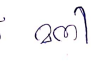

Saved: word_3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Predicted Word: വിധി with confidence: 56.84%


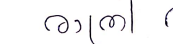

Saved: word_4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Predicted Word: പൂവ് with confidence: 32.68%


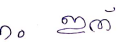

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import json
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the pre-trained EAST model
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# Function to preprocess image for prediction and display it
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Resize the image to the model's expected input size (32x128)
    img_resized = cv2.resize(img, (128, 32))

    # Apply Otsu's thresholding (binary thresholding)
    _, img_thresholded = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Normalize pixel values to the range [0, 1]
    img_thresholded = img_thresholded / 255.0

    # Add channel and batch dimensions
    img_thresholded = np.expand_dims(img_thresholded, axis=-1)  # Add channel dimension (grayscale)
    img_thresholded = np.expand_dims(img_thresholded, axis=0)   # Add batch dimension

    return img_thresholded

# Function to load class mapping from a JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    # Create reverse mapping (index to label)
    index_to_label = {v: k for k, v in class_mapping.items()}
    return index_to_label

# Function to predict a single image
def predict_word(image_path, model, class_mapping):
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Get predictions from the model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Convert the prediction to a word using the class mapping
    predicted_word = class_mapping[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    print(f"\nPredicted Word: {predicted_word} with confidence: {confidence:.2f}%")
    return predicted_word

# Function to decode predictions and get boxes from the EAST model
def decode_predictions(scores, geometry, conf_threshold=0.5):
    num_rows, num_cols = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        for x in range(num_cols):
            score = scores[0, 0, y, x]

            if score < conf_threshold:
                continue

            # Compute the offset
            offset_x, offset_y = x * 4.0, y * 4.0

            # Get the rotation angle
            angle = geometry[0, 4, y, x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            # Get the box dimensions
            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            # Calculate the bounding box coordinates
            end_x = int(offset_x + (cos * w) + (sin * h))
            end_y = int(offset_y - (sin * w) + (cos * h))
            start_x = int(offset_x - (cos * w) - (sin * h))
            start_y = int(offset_y + (sin * w) - (cos * h))

            # Add padding to the bounding box
            padding = 5
            start_x = max(0, start_x - padding)
            start_y = max(0, start_y - padding)
            end_x = min(W, end_x + padding)
            end_y = min(H, end_y + padding)

            # Append the box and confidence score
            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(float(score))

    return boxes, confidences

# Load the image and get its dimensions
image = cv2.imread('/content/Screenshot 2025-01-09 144651.png')
orig = image.copy()
(H, W) = image.shape[:2]

# Resize the image to a multiple of 32
new_W = (W // 32) * 32
new_H = (H // 32) * 32
resized_image = cv2.resize(image, (new_W, new_H))

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (new_W, new_H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3",
]
(scores, geometry) = net.forward(layer_names)

# Get boxes and confidences
boxes, confidences = decode_predictions(scores, geometry)

# Scale the boxes back to the original image size
ratio_w = W / float(new_W)
ratio_h = H / float(new_H)

scaled_boxes = []
for box in boxes:
    (start_x, start_y, end_x, end_y) = box
    start_x = int(start_x * ratio_w)
    start_y = int(start_y * ratio_h)
    end_x = int(end_x * ratio_w)
    end_y = int(end_y * ratio_h)
    scaled_boxes.append((start_x, start_y, end_x, end_y))

# Apply Non-Maximum Suppression to filter overlapping boxes
indices = cv2.dnn.NMSBoxes(scaled_boxes, confidences, 0.5, 0.4)

# Load the model and class mapping
model_path = "malayalam_word_recognition.h5"  # Path to your saved model
label_mapping_path = "label_mapping.json"  # Path to your saved label mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Crop, save, and predict each word segment
if len(indices) > 0:
    for i, index in enumerate(indices.flatten()):
        (start_x, start_y, end_x, end_y) = scaled_boxes[index]

        # Crop the detected region
        cropped_image = orig[start_y:end_y, start_x:end_x]

        # Save the cropped image
        file_name = f"word_{i + 1}.png"
        cv2.imwrite(file_name, cropped_image)
        print(f"Saved: {file_name}")

        # Predict the word
        predicted_word = predict_word(file_name, model, class_mapping)

        # Optionally, display the cropped image
        cv2_imshow(cropped_image)


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import json
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the pre-trained EAST model
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

# Function to preprocess image for prediction and display it
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Convert image to grayscale for thresholding
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding for better binarization
    img_thresholded = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Normalize pixel values to the range [0, 1]
    img_thresholded = img_thresholded / 255.0

    # Display the preprocessed image
    plt.figure(figsize=(10, 2))
    plt.imshow(img_thresholded, cmap='gray')
    plt.title("Preprocessed Image with Adaptive Thresholding")
    plt.axis('off')
    plt.show()

    return img_thresholded

# Function to decode predictions and get boxes from the EAST model
def decode_predictions(scores, geometry, conf_threshold=0.5):
    num_rows, num_cols = scores.shape[2:4]
    boxes = []
    confidences = []

    for y in range(num_rows):
        for x in range(num_cols):
            score = scores[0, 0, y, x]
            if score < conf_threshold:
                continue

            # Compute the offset
            offset_x, offset_y = x * 4.0, y * 4.0

            # Get the rotation angle
            angle = geometry[0, 4, y, x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            # Get the box dimensions
            h = geometry[0, 0, y, x] + geometry[0, 2, y, x]
            w = geometry[0, 1, y, x] + geometry[0, 3, y, x]

            # Calculate the bounding box coordinates
            end_x = int(offset_x + (cos * w) + (sin * h))
            end_y = int(offset_y - (sin * w) + (cos * h))
            start_x = int(offset_x - (cos * w) - (sin * h))
            start_y = int(offset_y + (sin * w) - (cos * h))

            # Add padding to the bounding box
            padding = 5
            start_x = max(0, start_x - padding)
            start_y = max(0, start_y - padding)
            end_x = min(W, end_x + padding)
            end_y = min(H, end_y + padding)

            # Append the box and confidence score
            boxes.append((start_x, start_y, end_x, end_y))
            confidences.append(float(score))

    return boxes, confidences

# Load the image and get its dimensions
image = cv2.imread('/content/Screenshot 2025-01-11 130302.png')
orig = image.copy()
(H, W) = image.shape[:2]

# Resize the image to a multiple of 32
new_W = (W // 32) * 32
new_H = (H // 32) * 32
resized_image = cv2.resize(image, (new_W, new_H))

# Prepare the image for the network
blob = cv2.dnn.blobFromImage(resized_image, 1.0, (new_W, new_H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)

# Get the output layers
layer_names = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3",
]
(scores, geometry) = net.forward(layer_names)

# Get boxes and confidences
boxes, confidences = decode_predictions(scores, geometry)

# Scale the boxes back to the original image size
ratio_w = W / float(new_W)
ratio_h = H / float(new_H)

scaled_boxes = []
for box in boxes:
    (start_x, start_y, end_x, end_y) = box
    start_x = int(start_x * ratio_w)
    start_y = int(start_y * ratio_h)
    end_x = int(end_x * ratio_w)
    end_y = int(end_y * ratio_h)
    scaled_boxes.append((start_x, start_y, end_x, end_y))

# Apply Non-Maximum Suppression to filter overlapping boxes
indices = cv2.dnn.NMSBoxes(scaled_boxes, confidences, 0.5, 0.4)

# Load the model and class mapping
model_path = "malayalam_word_recognition.h5"  # Path to your saved model
label_mapping_path = "label_mapping.json"  # Path to your saved label mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Crop, save, and predict each word segment
if len(indices) > 0:
    for i, index in enumerate(indices.flatten()):
        (start_x, start_y, end_x, end_y) = scaled_boxes[index]

        # Crop the detected region
        cropped_image = orig[start_y:end_y, start_x:end_x]

        # Save the cropped image
        file_name = f"word_{i + 1}.png"
        cv2.imwrite(file_name, cropped_image)
        print(f"Saved: {file_name}")

        # Predict the word
        predicted_word = predict_word(file_name, model, class_mapping)

        # Optionally, display the cropped image
        cv2_imshow(cropped_image)


error: OpenCV(4.10.0) /io/opencv/modules/dnn/src/caffe/caffe_io.cpp:1138: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "frozen_east_text_detection.pb" in function 'ReadProtoFromBinaryFile'


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt
import os
os.environ['TESSDATA_PREFIX'] = '/usr/share/'



# Function to preprocess image for prediction and display it
def preprocess_image(image):
    img_resized = cv2.resize(image, (128, 32))  # Resize to match input shape
    _, img_thresholded = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Thresholding
    img_thresholded = img_thresholded / 255.0  # Normalize the image
    img_thresholded = np.expand_dims(img_thresholded, axis=-1)  # Add channel dimension (grayscale)
    img_thresholded = np.expand_dims(img_thresholded, axis=0)   # Add batch dimension
    return img_thresholded

# Function to load class mapping from a JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    index_to_label = {v: k for k, v in class_mapping.items()}  # Reverse the mapping
    return index_to_label

# Function to predict a single word image
def predict_word(image, model, class_mapping):
    img_array = preprocess_image(image)  # Preprocess the input image
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])  # Get the predicted class index
    predicted_word = class_mapping[predicted_class_index]  # Map index to word
    confidence = predictions[0][predicted_class_index] * 100  # Calculate confidence
    return predicted_word, confidence

# Function to process the input sentence, split it into words and predict each word
def predict_sentence(image_path, model, class_mapping):
    # Read the image using OCR (pytesseract)
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Use Tesseract to detect words in the image
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    custom_config = r'--oem 3 --psm 6'  # Set OCR configuration for better results
    ocr_result = pytesseract.image_to_data(gray_image, output_type=pytesseract.Output.DICT, config=custom_config, lang='malayalam')

    # Extract words and their bounding boxes from OCR result
    words = []
    for i in range(len(ocr_result['text'])):
        if int(ocr_result['conf'][i]) > 0:  # Filter out low-confidence words
            word = ocr_result['text'][i]
            if word.strip():  # Non-empty word
                words.append((word, (ocr_result['left'][i], ocr_result['top'][i], ocr_result['width'][i], ocr_result['height'][i])))

    print("\nDetected Words:")
    print("-" * 50)
    for word, _ in words:
        print(word)

    # Predict each word
    predictions = []
    for word, (x, y, w, h) in words:
        word_image = img[y:y+h, x:x+w]  # Crop the word from the image
        predicted_word, confidence = predict_word(word_image, model, class_mapping)
        predictions.append((predicted_word, confidence))

    # Display predictions
    print("\nPredictions for Detected Words:")
    print("-" * 50)
    for word, confidence in predictions:
        print(f"{word}: {confidence:.2f}%")

    return predictions

# Example usage for predicting a sentence image
model_path = "malayalam_word_recognition.h5"  # Path to your saved model
image_path = "/content/Screenshot 2025-01-09 144651.png"  # Path to your test image
label_mapping_path = "label_mapping.json"  # Path to your saved label mapping

# Load the trained model and class mapping
model = tf.keras.models.load_model(model_path)
class_mapping = load_class_mapping(label_mapping_path)

# Predict words in the sentence
predict_sentence(image_path, model, class_mapping)


TesseractError: (1, 'Error opening data file /usr/share/malayalam.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'malayalam\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
import json
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/'

# Function to preprocess image for prediction and display it
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Resize the image to the model's expected input size (32x128)
    img_resized = cv2.resize(img, (128, 32))

    # Apply Otsu's thresholding (binary thresholding)
    _, img_thresholded = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Normalize pixel values to the range [0, 1]
    img_thresholded = img_thresholded / 255.0

    # Add channel and batch dimensions
    img_thresholded = np.expand_dims(img_thresholded, axis=-1)  # Add channel dimension (grayscale)
    img_thresholded = np.expand_dims(img_thresholded, axis=0)   # Add batch dimension

    return img_thresholded, img

# Function to load class mapping from JSON file
def load_class_mapping(mapping_file):
    with open(mapping_file, 'r', encoding='utf-8') as f:
        class_mapping = json.load(f)
    return class_mapping

# Function to predict a word using the model
def predict_word(word_image, model, class_mapping):
    # Preprocess word image (resize and normalize)
    word_image_resized = cv2.resize(word_image, (128, 32)) / 255.0
    word_image_resized = np.expand_dims(word_image_resized, axis=-1)  # Add channel dimension
    word_image_resized = np.expand_dims(word_image_resized, axis=0)  # Add batch dimension

    # Predict the word using the model
    predictions = model.predict(word_image_resized)
    predicted_class_index = np.argmax(predictions[0])

    # Check if the predicted class index is in the class mapping
    if predicted_class_index in class_mapping:
        # Convert the prediction to a word using the class mapping
        predicted_word = class_mapping[predicted_class_index]
        confidence = predictions[0][predicted_class_index] * 100
        return predicted_word, confidence
    else:
        return "Unknown", 0.0

# Function to segment and predict words in a sentence
def predict_sentence(image_path, model, class_mapping):
    # Read the input image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    # Use pytesseract to segment the words
    boxes = pytesseract.image_to_boxes(img)
    words = boxes.splitlines()

    # Display the original image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Segmented Words")

    predicted_words = []

    for word in words:
        # Split each word's box info (character x, y, width, height)
        b = word.split()
        x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
        # Draw the bounding box on the image
        img = cv2.rectangle(img, (x, h), (w, y), (0, 255, 0), 2)

        # Crop the word from the image
        word_image = img[y:h, x:w]

        # Predict the word
        predicted_word, confidence = predict_word(word_image, model, class_mapping)
        predicted_words.append((predicted_word, confidence))

        # Display the predicted word and confidence
        print(f"Predicted Word: {predicted_word}, Confidence: {confidence:.2f}%")

    # Show the image with bounding boxes
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Words Segmentation with Prediction")
    plt.axis('off')
    plt.show()

    return predicted_words

# Load the trained model
model_path = "malayalam_word_recognition.h5"  # Replace with your model path
model = load_model(model_path)

# Load the class mapping
label_mapping_path = "label_mapping.json"  # Replace with your label mapping path
class_mapping = load_class_mapping(label_mapping_path)

# Example usage for predicting words in a sentence
image_path = "/content/Screenshot 2025-01-09 144651.png"  # Replace with your image path
predicted_words = predict_sentence(image_path, model, class_mapping)

# Print the predicted words and their confidence
for word, confidence in predicted_words:
    print(f"Predicted Word: {word}, Confidence: {confidence:.2f}%")


TesseractError: (1, 'Error opening data file /usr/share/tesseract-ocr/4.00/eng.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'eng\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

In [ ]:
!ls /usr/share/tesseract-ocr/4.00/tessdata/


configs		 malayalam.traineddata	osd.traineddata  tessconfigs
eng.traineddata  mal.traineddata	pdf.ttf
